# 밑바닥부터 시작하는 딥러닝

# Deep Learning from Scratch

## Github 

https://github.com/WegraLee/deep-learning-from-scratch

## 목차

http://nbviewer.jupyter.org/github/SDRLurker/deep-learning/blob/master/%EB%AA%A9%EC%B0%A8.ipynb

# 4 신경망 학습
학습: 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것

손실 함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습 목표

함수의 기울기를 활용하는 경사법 소개

## 4.1 데이터에서 학습한다!

데이터를 보고 학습: 가중치 매개변수의 값을 데이터를 보고 자동으로 결정

신경망 학습(데이터로부터 매개변수의 값을 정하는 방법) 설명

손글씨 숫자를 학습하는 코드 구현

### 4.1.1 데이터 주도 학습
기계학습의 중심에는 데이터가 존재

수집한 데이터로부터 패턴을 찾으려 시도

In [1]:
# 그림 4-1 손글씨 숫자 '5'의 예: 사람마다 자신만의 필체가 있다.
# 출처 https://www.researchgate.net/figure/265798034_fig2_Figure-5-Images-obtained-from-the-hand-written-data-base-MNIST
from IPython.display import Image, display
display(Image(filename='5.png', embed=True))

숫자(5)를 인식하는 명확한 로직을 사람이 만들기 어려움

기계학습의 2 가지 접근법

(1) 사람이 생각한 특징(SIFT, HOG 등) -> 기계학습(SVM, KNN등)

* 이미지에서 특징(feature)을 추출. SIFG, HOG 등의 특징 사용. 벡터로 기술.

* 기계학습: 데이터로부터 규칙을 찾아내는 역할

(2) 신경망(딥러닝): 이미지를 '있는 그대로' 학습

종단간 기계학습(end-to-end machine learning) : 처음부터 끝까지, 데이터(입력)에서 목표한 결과(출력)을 얻음

### 4.1.2 훈련 데이터와 시험 데이터
기계학습 문제는 훈련 데이터(training data)와 시험 데이터(test data)로 나눠 학습과 실험을 수행하는 것이 일반적

범용 능력을 제대로 평가하기 위해 훈련 데이터와 시험 데이터를 분리

범용 능력: 아직 보지 못한 데이터(훈련 데이터에 포함되지 않는 데이터)로도 문제를 올바르게 풀어내는 능력. 기계학습의 최종목표.

오버피팅(overfitting): 한 데이터셋(예시: 훈련 데이터만)에만 지나치게 최적화된 상태. 다른 데이터셋을 엉망으로 평가할 수 있음

## 4.2 손실 함수
신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현. 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색.

손실함수(loss function): 신경망 성능의 '나쁨'을 나타내는 지표

* 평균 제곱 오차
* 교차 엔트로피 오차

### 4.2.1 평균 제곱 오차
평균 제곱 오차(mean squared error, MSE) 수식

\begin{equation*}
E = \frac{1}{2} \sum_{k} (y_{k}-t_{k})^{2}
\end{equation*}

* yk 신경망의 출력(신경망이 추정한 값)
* tk 정답 레이블
* k 데이터의 차원 수 

In [2]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

배열들의 원소는 첫 번째 인덱스부터 순서대로 숫자 '0', '1', '2', ...일 때 값

y 소프트맥스 함수의 출력

t 정답을 의미하는 위치의 원소는 1로, 그 외에는 0으로 표기

숫자 '2'에 해당하는 원소의 값이 1이므로 정답이 '2'

원-핫 인코딩: 한 원소만 1로 하고 그 외는 0으로 나타내는 표기법

평균 제곱 오차 파이썬 구현

In [3]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [4]:
import numpy as np
# 예1: '2'일 확률이 가장 높다고 추정함 (0.6)
mean_squared_error(np.array(y), np.array(t))

0.097500000000000031

In [5]:
# 예2 '7'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.59750000000000003

첫 번째 예: 정답이 '2', 신경망의 출력도 '2'

두 번째 예: 정답이 '2', 신경망의 출력은 '7'

평균 제곱 오차를 기준으로 첫 번째 추정 결과가 오차가 더 작으니 정답에 더 가까울 것이라 판단 가능

### 4.2.2 교차 엔트로피 오차
교차 엔트로피 오차(cross entropy error, CEE) 수식

\begin{equation*}
E = - \sum_{k} t_{k} log y_{k}
\end{equation*}

* log는 밑이 e인 자연로그
* yk 신경망의 출력(신경망이 추정한 값)
* tk 정답 레이블 : 정답에 해당하는 인덱스의 원소만 1, 나머지는 0(원-핫 인코딩)

정답 레이블은 '2'가 정답. 신경망 출력이 0.6이라면 교차 엔트로피 오차는 -log0.6 = 0.51

같은 조건에서 신경망 출력이 0.1이라면 -log0.1 = 2.3

그림 4-3 자연로그 y = logx 그래프

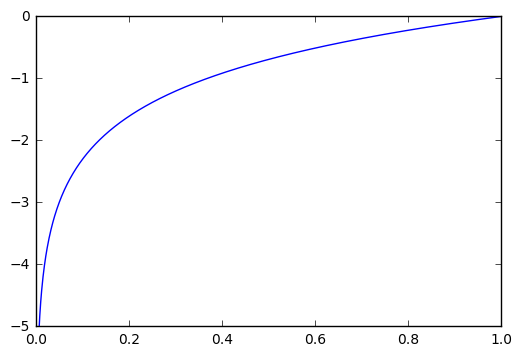

In [6]:
%matplotlib inline
import matplotlib.pylab as plt

x = np.arange(0.001, 1.0, 0.001)
y = np.log(x)
plt.plot(x, y)
plt.ylim(-5.0, 0.0) # y축의 범위 지정
plt.show()

x가 1일 때 y는 0이 되고 x가 0에 가까워질 수록 y의 값은 점점 작아짐

교차 엔트로피 구현

In [7]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

y와 t는 넘파이 배열. 

아주 작은 delta 값을 더하는 이유

np.log 함수에 0을 입력하면 마이너스 무한대를 뜻하는 -inf가 되어 계산을 진행할 수 없음

y가 0이 되지 않도록 delta를 더하였음

cross_entropy_error 계산 예시

In [8]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.51082545709933802

In [9]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.3025840929945458

첫 번째 예: 정답일 때의 출력 0.6인 경우 교차 엔트로피 오차는 약 0.51

두 번째 예: 출력이 0.1이라면 교차 엔트로피 오차는 약 2.3

첫 번째 추정이 정답일 가능성이 높다고 판단

### 4.2.3 미니배치 학습
훈련 데이터 모두에 대한 손실함수의 평균을 구함

교차 엔트로피 오차(훈련 데이터 모두에 대한) 수식

\begin{equation*}
E = - \frac{1}{N} \sum_{n} \sum_{k} t_{nk} log y_{nk}
\end{equation*}

데이터가 N개. tnk: n번째 데이터의 k차원 째 값을 의미.

ynk는 신경망의 출력. tnk는 정답 레이블

N으로 나눔으로써 '평균 손실 함수'를 구함

미니배치: 훈련 데이터로부터 일부만 골라 학습을 수행

미니배치 학습: 60,000장의 훈련 데이터 중 100장을 무작위로 뽑아 그 100장을 사용하여 학습

MNIST 데이터셋을 읽어오는 코드

In [10]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

(60000, 784)
(60000, 10)


load_mnist 함수로 MNIST (훈련 데이터와 시험 데이터) 데이터셋을 읽음.

one_hot_label=True로 지정하여, 원-핫 인코딩. 정답 위치의 원소만 1이고 나머지가 0인 배열을 얻음.

훈련 데이터에서 무작위로 10장만 빼내려면? np.random.choice() 함수 사용.

In [11]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

np.random.choice(60000, 10)은 0에서 60000 미만의 수 중에서 무작위로 10개를 골라냄

이 함수가 출력한 배열을 미니배치로 뽑아낼 데이터의 인덱스로 사용가능

In [12]:
np.random.choice(60000, 10)

array([ 6400, 19286,  1782,  3374, 49695, 27075, 13458, 28598, 31095, 59321])

미니배치의 손실 함수도 일부 표본 데이터로 전체를 비슷하게 계측.

전체 훈련 데이터의 대표로서 무작위로 선택한 작은 덩어리(미니배치)를 사용하는 것.

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기
배치 데이터를 처리할 수 있는 교차 엔트로피 오차 구하기

(데이터가 하나인 경우와 배치로 묶여 입력될 경우 모두 처리할 수 있음)

In [13]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

y는 신경망의 출력, t는 정답 레이블.

y가 1차원이라면, 데이터 하나당 교차 엔트로피 오차를 구하는 경우는 reshape로 형상을 변경.

배치의 크기로 나눠 정규화하고 이미지 1장당 평균의 교차 엔트로피 오차를 계산

정답 레이블이 원-핫 인코딩이 아닌 숫자 레이블('2', '7')로 주어졌을 때 교차 엔트로피 오차

In [14]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

원-핫 인코딩일 때 t가 0인 원소는 교차 엔트로피 오차도 0이므로 그 계산은 무시해도 좋음

정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차를 계산할 수 있음

t * np.log(y) 부분을 np.log(y[np.arange(batch_size),t])로 구현

np.log(y[np.arange(batch_size),t] 설명

batch_size가 5면 np.arange(batch_size)는 [0, 1, 2, 3, 4]

t에는 레이블이 [2, 7, 0, 9, 4]와 같이 저장됨

y[np.arange(batch_size),t]는 각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출

y[np.arange(batch_size),t] = [y[0,2], y[1,7], y[2,0], y[3,9], y[4,4]] 인 넘파이 배열 생성

### 4.2.5 왜 손실 함수를 설정하는가?
신경망 학습에서는 최적의 매개변수(가중치와 편향)를 탐색할 때 손실 함수의 값을 가능한 작게 하는 매개변수 값을 찾음

매개변수의 미분을 계산하고, 그 미분 값을 단서로 매개변수 값을 서서히 갱신하는 과정을 반복

<u>신경망을 학습할 때 정확도를 지표로 삼아서는 안 된다. 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다.</u>

매개변수를 약간만 조정해서는 정확도가 개선되지 않고 일정하게 유지. 개선되도 불연속적인 값으로 바뀜.

손실함수를 지표로 삼으면 매개변수 값이 조금 변하면 그에 반응하여 연속적으로 변화.

계산함수의 미분은 대부분의 장소(0 이외의 곳)에서 0.

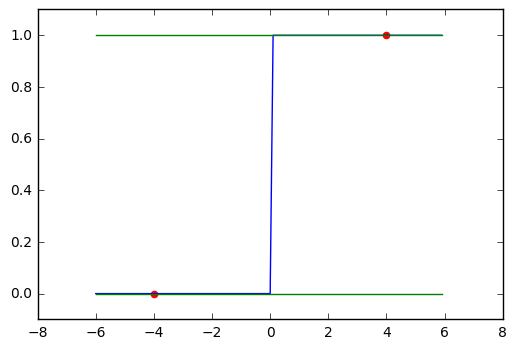

In [15]:
# 그림 4-4 계단함수와 시그모이드 함수: 계단 함수는 대부분의 장소에서 기울기가 0이지만, 시그모이드 함수의 기울기(접선)는 0이 아니다.
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-6.0, 6.0, 0.1)
y1 = step_function(x)
y2 = np.array([1 for _ in range(x.size)])
y3 = np.array([0 for _ in range(x.size)])
plt.plot(x, y1)
plt.plot(x, y2, color='green')
plt.plot(x, y3, color='green')
plt.scatter([4,-4],[1,0],color='red')

plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

시그모이드 함수의 기울기(접선)은 0이 아니다.

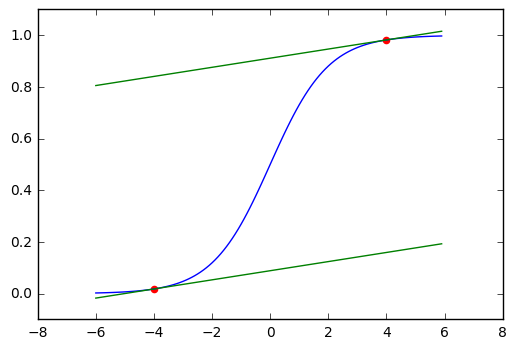

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_diff(x):
    return sigmoid(x) * (1 - sigmoid(x))

def 시그모이드_접선(x): # 접선 ax+b에서 a,b 값을 리턴
    return sigmoid_diff(x), sigmoid(x) - sigmoid_diff(x) * x

x = np.arange(-6.0, 6.0, 0.1)
y1 = sigmoid(x)
a2, b2 = 시그모이드_접선(4)
y2 = a2 * x + b2
a3, b3 = 시그모이드_접선(-4)
y3 = a3 * x + b3
plt.plot(x, y1)
plt.plot(x, y2, color='green')
plt.plot(x, y3, color='green')
plt.scatter([4,-4],[a2*4+b2,a3*-4+b3],color='red')

plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

계단 함수는 한 순간만 변화를 일으킴.

시그모이드 함수는 출력이 연속적으로 변하고 곡선의 기울기(미분)도 연속적으로 변함.

기울기가 0이 되지 않는 덕분에 신경망이 올바르게 학습됨.

## 4.3 수치미분
경사법에서는 기울기(경사) 값을 기준으로 나아갈 방향을 결정

'미분' 복습

### 4.3.1 미분
'특정 순간'의 변화량

미분은 한순간의 변화량을 표시한 것. 수식

\begin{equation*}
\frac{df(x)}{dx} = lim_{h->0} \frac{f(x+h)-f(x)}{h} 
\end{equation*}

좌변은 f(x)의 x에 대한 미분(x에 대한 f(x)의 변화량)을 나타내는 기호

작은 변화, 시간을 뜻하는 h를 한없이 0에 가깝게 한다는 의미

\begin{equation*}
lim_{h->0}
\end{equation*}

함수의 미분을 구하는 계산 파이썬 구현

In [17]:
# 나쁜 구현 예
def numerical_diff():
    h = 10e-50
    return (f(x + h) - f(x)) / h

함수 이름은 수치 미분(numerical differentiation)에서 따온 numerical_diff(f,x)로 함

2개의 인수: '함수 f'와 함수 f에 넘길 '인수 x'

이 함수의 문제점

* 반올림 오차(rounding error): 작은 값(가령 소수점 8자리 이하)이 생략되어 최종 계산 결과에 오차가 발생

In [18]:
np.float32(1e-50)

0.0

미세한 값 h를 10 \*\* -4를 이용.

10 \*\* -4 정도의 값을 사용하면 좋은 결과를 얻는다고 알려져 있음

* f의 차분(임의 두 점에서 함수 값들의 차이) 계산에 오차

x+h와 x 사이의 함수 f의 차분을 계산

진정한 미분은 x 위치의 함수의 기울기(접선)

이번 구현에서 구한 미분은 (x+h)와 x 사이의 기울기에 해당

h를 무한히 0으로 좁히는 것이 불가능해 생기는 한계

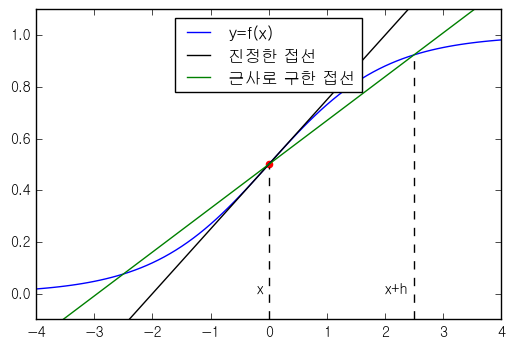

In [19]:
# 그림 4-5 진정한 미분(진정한 접선)과 수치 미분(근사로 구한 접선)의 값은 다르다.
# -*- coding: utf-8 -*-
from matplotlib import rc
import matplotlib.font_manager as fm
import matplotlib
#matplotlib.rc('figure', figsize=(16, 4))
# 우분투에 나눔글꼴 설치한 경우 (c9.io) 
#fp = fm.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf")
# Windows 경우
#fp = fm.FontProperties(fname="c:/Windows/Fonts/NanumGothic.ttf")
fp = fm.FontProperties(fname="c:/Windows/Fonts/NGULIM.ttf")
# MacOS 경우
#fp = fm.FontProperties(fname="/Users/plusjune/Library/Fonts/NanumGothic.ttf")
rc('font', family=fp.get_name())

x = np.arange(-6.0, 6.0, 0.1)
y1 = sigmoid(x)
a2, b2 = 시그모이드_접선(0)
y2 = a2 * x + b2
a3 = (sigmoid(2.5) - sigmoid(0)) / 2.5
y3 = a3 * x + b2

plt.plot(x, y1, label='y=f(x)')
plt.plot(x, y2, color='black', label='진정한 접선')
plt.plot(x, y3, color='green', label='근사로 구한 접선')
xv = np.arange(-0.1, 0.5, 0.01)
plt.text(-0.2,0,"x")
plt.plot(np.array([0 for _ in range(xv.size)]), xv, 'k--')
xhv = np.arange(-0.1, sigmoid(2.5), 0.01)
plt.text(2,0,"x+h")
plt.plot(np.array([2.5 for _ in range(xhv.size)]), xhv, 'k--')
plt.scatter([0],[b2],color='red')

plt.ylim(-0.1,1.1)
plt.xlim(-4,4)
plt.legend(loc='upper center')
plt.show()

위 그래프처럼 수치 미분에는 오차가 포함

중심차분, 중앙차분: 이 오차를 줄이기 위해 (x+h)와 (x-h)일 때의 함수 f의 차분을 계산하는 방법을 사용

전방차분: (x+h)와 x의 차분

위의 2가지 개선점을 적용한 수치 미분 구현

In [20]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

수치 미분: 아주 작은 차분으로 미분을 구하는 것

해석적(analytic) 해: 수식을 전개해 미분을 구하는 것

해석적 미분은 오차를 포함하지 않는 '진정한 미분' 값을 구함

### 4.3.2 수치 미분의 예
간단한 함수 미분 예시

2차 함수

\begin{equation*}
y = 0.01x^{2} + 0.1x
\end{equation*}

In [21]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

이 함수 그래프로 그리기

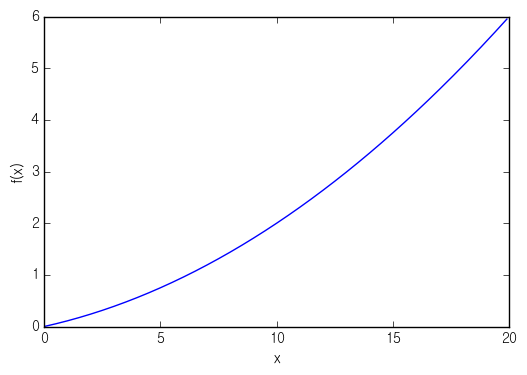

In [22]:
# 그림 4-6 식 f(x)=0.01x**2 + 0.1x 그래프
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다.
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

x = 5, 10일때 미분 계산

In [23]:
numerical_diff(function_1, 5)

0.1999999999990898

In [24]:
numerical_diff(function_1, 10)

0.2999999999986347

위에서 계산한 미분 값이 x에 대한 f(x)의 변화량

\begin{equation*}
y = 0.01x^{2} + 0.1x
\end{equation*}

의 해석적 해법은 

\begin{equation*}
\frac{df(x)}{dx} = 0.02x + 0.1
\end{equation*}

x가 5, 10일 때 '진정한 미분'은 0.2, 0.3이 됨.

앞의 수치 미분과 결과를 비교하면 오차가 매우 작음.

x=5, x=10에서의 접선: 직선의 기울기는 수치 미분에서 구한 값을 사용하였다.

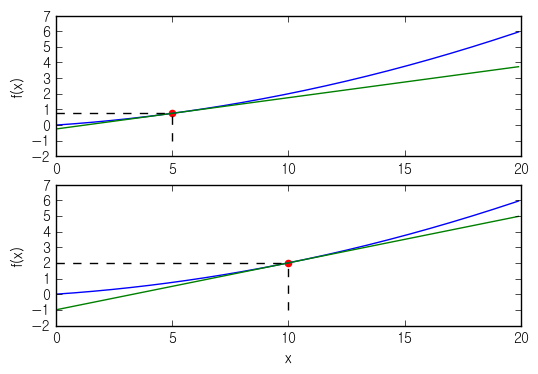

In [25]:
# 그림 4-7 x=5, x=10에서의 접선: 직선의 기울기는 수치 미분에서 구한 값을 사용하였다.
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/gradient_1d.py 소스 참고

def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

def draw(ax, x, y, line, tox, toy):
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.plot(x, y)
    ax.plot(x, line)
    h = np.arange(0, tox, 0.01)
    v = np.arange(-1, toy, 0.01)
    ax.plot(np.array([tox for _ in range(v.size)]), v, 'k--')
    ax.plot(h, np.array([toy for _ in range(h.size)]), 'k--')
    ax.scatter(tox,toy,color='red')
    ax.set_xlim([0,20])
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

tf = tangent_line(function_1, 5)
y2 = tf(x)
tf = tangent_line(function_1, 10)
y3 = tf(x)

f, (ax1, ax2) = plt.subplots(2, 1)
draw(ax1, x, y, y2, 5, function_1(5))
draw(ax2, x, y, y3, 10, function_1(10))

### 4.3.3 편미분
변수가 다음처럼 2개 이상인 식

\begin{equation*}
f(x_{0}, x_{1}) = x_{0}^{2} + x_{1}^{2}
\end{equation*}

파이썬으로 다음과 같이 구현가능

In [26]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

위 함수를 그래프로 그리기

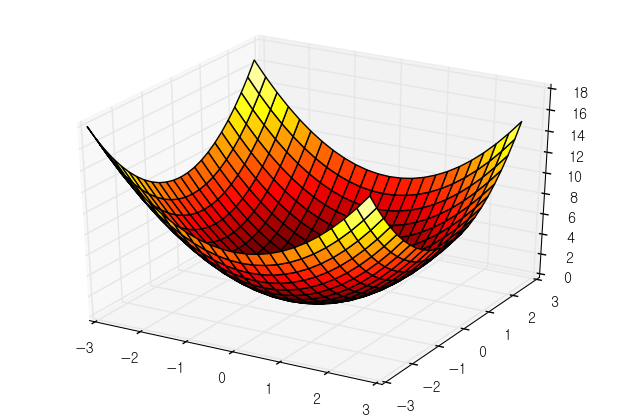

In [27]:
# 그림 4-8 f(x0, x1) = x0**2 + x1**2 그래프
# 3차원 참고주소: https://www.datascienceschool.net/view-notebook/6e71dbff254542d9b0a054a7c98b34ec/
from mpl_toolkits.mplot3d import Axes3D
X = np.arange(-3, 3, 0.25)
Y = np.arange(-3, 3, 0.25)
XX, YY = np.meshgrid(X, Y)
ZZ = XX**2 + YY**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1, cmap='hot');

편미분: 변수가 여럿인 함수에 대한 미분. 어느 변수에 대한 미분이냐를 구별해야 함

수식으로는 다음처럼 씀

\begin{equation*}
\frac{\partial f}{\partial x_{0}}, \frac{\partial f}{\partial x_{1}}
\end{equation*}

문제 1: x0=3, x1=4일 때 x0에 대한 편미분을 구하라.

In [28]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

문제 2: x0=3, x1=4일 때 x1에 대한 편미분을 구하라.

In [29]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

문제 1에서는 x1=4로 고정된 새로운 함수를 정의, 변수가 x0 하나뿐인 함수에 대해 수치 미분함수 적용.

편미분은 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구함

목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정

## 4.4 기울기
기울기(gradient): 모든 변수의 편미분을 벡터로 정리한 것.

\begin{equation*}
(\frac{\partial f}{\partial x_{0}}, \frac{\partial f}{\partial x_{1}})
\end{equation*}

기울기 구현예시

In [30]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

numerical_gradient(f, x) 동작 방식은 변수가 하나일 때의 수치 미문과 거의 같음

np.zeros_like(x): x와 형상이 같고 그 원소가 모두 0인 배열을 만듬

이 함수를 이용하여 세 점 (3,4), (0.2), (3,0)에서 기울기 구하기

In [31]:
_numerical_gradient_no_batch(function_2, np.array([3.0, 4.0]))

array([ 6.,  8.])

In [32]:
_numerical_gradient_no_batch(function_2, np.array([0.0, 2.0]))

array([ 0.,  4.])

In [33]:
_numerical_gradient_no_batch(function_2, np.array([3.0, 0.0]))

array([ 6.,  0.])

기울기의 결과에 마이너스를 붙인 벡터 그리기

C:\Users\RyanShin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


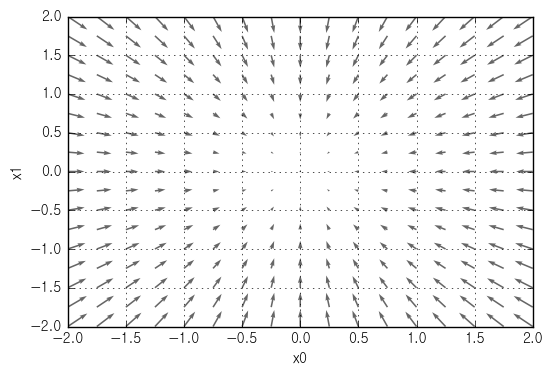

In [34]:
# 그림 4-9 f(x0, x1) = x0**2 + x1**2 의 기울기
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/gradient_2d.py 소스 참고
from mpl_toolkits.mplot3d import Axes3D

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)
    
X = X.flatten()
Y = Y.flatten()
    
grad = numerical_gradient(function_2, np.array([X, Y]) )
    
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

기울기는 방향을 가진 벡터(화살표)로 그려짐

'가장 낮은 곳'에서 멀어질 수록 화살표가 커짐을 알 수 있음.

<u>기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 줄이는 방향</u>

### 4.4.1 경사법(경사 하강법)
최적의 매개변수(가중치와 편향)을 학습 시에 찾음. 최적은 손실함수가 최소값이 될 때 매개변수 값.

경사법: 기울기를 잘 이용해 함수의 최소값을 찾으려는 방법

함수가 극소값, 최소값, 안장점(saddle point)이 되는 장소에서는 기울기가 0

극소값: 한정된 범위에서의 최소값인 점

안장점: 어느 방향에서 보면 극대값 다른 방향에서 보면 극소값이 되는 점

복잡하고 찌그러진 모양의 함수라면 (대부분) 평평한 곳으로 파고들면서 고원(plateau, 플래토)이라 하는, 

학습이 진행되지 않는 정체기에 빠질 수 있음.

경사법(gradient method)

현 위치에서 기울어진 방향으로 일정 거리만큼 이동. 다음 위치에서도 또 기울어진 방향으로 나아가는 일을 반복.

경사 하강법(gradient descent method): 최소값을 찾음. 신경망(딥러닝) 분야에서 주로 사용.

경사 상승법(gradient ascent method): 최대값을 찾음

경사법 수식

\begin{equation*}
x_{0} = x_{0} - \eta \frac{\partial f}{\partial x_{0}}
\end{equation*}
\begin{equation*}
x_{1} = x_{1} - \eta \frac{\partial f}{\partial x_{1}}
\end{equation*}

학습률(learning rate): 한 번에 얼만큼 학습해야 할 지, 매개변수 값을 얼마나 갱신하느냐를 정함

위의 식은 1회에 해당하는 갱신이고, 이 단계를 반복

변수의 값을 여러번 갱신하면서 서서히 함수의 값을 줄임

학습률 값을 변경하면서 올바르게 학습하는 지 확인하면서 진행. 너무 크거나 작으면 '좋은 장소'를 찾을 수 없음.

경사 하강법 구현코드

In [35]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

f는 최적화하려는 함수, init_x는 초기값, lr은 learning rate를 의미하는 학습률, step_num은 경사법 반복 회수

numerical_gradient(f, x)로 함수의 기울기를 구함. 그 기울기에 학습률을 곱한 값으로 갱신하는 처리를 step_num번 반복

문제: 경사법으로 f(x0,x1) = x0 \*\* 2 + x1 \*\* 2의 최소값을 구하라.

In [36]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([ -6.11110793e-10,   8.14814391e-10])

초기값을 (-3.0, 4.0)으로 설정한 후 경사법을 사용해 최소값을 구함

경사법을 이용한 갱신 과정 그래프

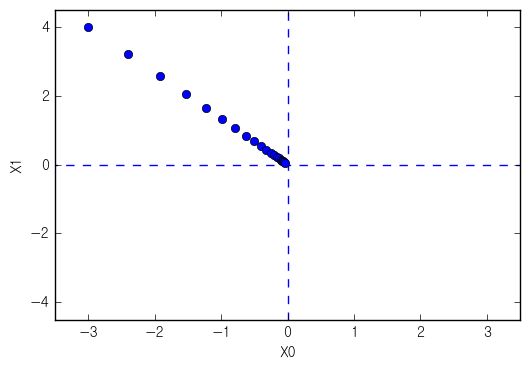

In [37]:
# 그림 4-10 f(x0, x1) = x0**2 + x1**2 의 갱신 과정 : 점선은 함수의 등고선을 나타낸다.
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/gradient_method.py 소스 참고
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

학습률이 너무 클 때와 작을 때 문제

In [38]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [39]:
# 학습률이 너무 큰 예 : lr=10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([ -2.58983747e+13,  -1.29524862e+12])

In [40]:
# 학습률이 너무 작은 예 : lr=1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

학습률이 너무 크면 큰 값으로 발산함

학습률이 너무 작으면 거의 갱신되지 않은 채 끝남

하이퍼파라미터(hyper parameter, 초매개변수)

사람이 직접 설정해야 하는 매개변수. 시험을 통해 가장 잘 학습하는 값을 찾는 과정이 필요.

### 4.4.2 신경망에서의 기울기
신경망 기울기: 가중치 매개변수에 관한 손실 함수의 기울기

형상 2X3, 가중치 W, 손실함수 L인 신경망 수식

\begin{equation*}
W =  \begin{vmatrix}
w_{11} w_{21} w_{31}\\
w_{12} w_{22} w_{32}\
\end{vmatrix}
\end{equation*}

\begin{equation*}
\frac{\partial{L}}{\partial{W}} =  \begin{vmatrix}
\frac{\partial{L}}{\partial{W_{11}}} \frac{\partial{L}}{\partial{W_{21}}} \frac{\partial{L}}{\partial{W_{31}}}\\
\frac{\partial{L}}{\partial{W_{12}}} \frac{\partial{L}}{\partial{W_{22}}} \frac{\partial{L}}{\partial{W_{32}}}\
\end{vmatrix}
\end{equation*}

아래 행렬의 각 원소는 각각 원소에 대한 편미분

간단한 신경망에 대한 기울기를 구하는 코드

In [41]:
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/common/gradient.py 소스 참고
import numpy as np

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

simpleNet 클래스는 형상이 2X3인 가중치 매개변수 하나를 인스턴스 변수로 가짐

predict(x) 메소드, loss(x,t) 메소드

인수 x는 입력 데이터, t는 정답 레이블

simpleNet 몇 가지 시험

In [42]:
net = simpleNet()
print(net.W) # 가중치 매개변수

[[-0.48896906 -0.43767281  0.94069236]
 [ 1.56181584 -0.6269286  -2.09184833]]


In [43]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 1.11225282 -0.82683942 -1.31824808]


In [44]:
np.argmax(p) # 최대값의 인덱스

0

In [45]:
t = np.array([1, 0, 0]) # 정답 레이블
net.loss(x,t)

0.20849859791009334

numerical_gradient 함수를 사용하여 기울기 구하기

In [46]:
def f(W):
    return net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[-0.1129187   0.07005907  0.04285962]
 [-0.16937804  0.10508861  0.06428943]]


w11은 대략 -0.11, w11을 h만큼 늘리면 손실함수는 -0.11h만큼 감소. 손실함수를 줄이려면 '양의 방향' 으로 갱신해야 함.

w23은 대략 0.06, w23을 h만큼 늘리면 손실함수는 0.06h만큼 증가. 손실함수를 줄이려면 '음의 방향' 으로 갱신해야 함.

파이썬에서는 간단한 함수는 lambda 기법을 쓰면 더 편리함

In [47]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[-0.1129187   0.07005907  0.04285962]
 [-0.16937804  0.10508861  0.06428943]]


## 4.5 학습 알고리즘 구현하기
신경망 학습의 절차

학습: 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정

1단계 - 미니배치 : 훈련 데이터 중 일부를 무작위로 가져옴. 손실 함수 값을 줄이는 것이 목표.

2단계 - 기울기 산출 : 각 가중치 매개변수의 기울기를 구함. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시

3단계 - 매개변수 갱신 : 가중치 매개변수를 기울기 방향으로 아주 조금 갱신

4단계 - 반복 : 1~3단계를 반복

확률적 경사 하강법(stochastic gradient descent, SGD) : 미니배치로 무작위로 선택하여 골라낸 데이터로 경사 하강법 실시

### 4.5.1 2층 신경망 클래스 구현하기
2층 신경망을 하나의 클래스로 구현. 클래스명은 TwoLayerNet

In [48]:
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/two_layer_net.py 소스 참고
import numpy as np

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

TwoLayerNet 클래스가 사용하는 변수

params : 신경망의 매개변수를 보관하는 딕셔너리

params['W1'] : 1번째 층의 가중치, params['b1'] : 1번째 층의 편향

params['W2'] : 2번째 층의 가중치, params['b2'] : 2번째 층의 편향

grads : 기울기를 보관하는 딕셔너리

grads['W1'] : 1번째 층의 가중치, grads['b1'] : 1번째 층의 편향

grads['W2'] : 2번째 층의 가중치, grads['b2'] : 2번째 층의 편향

TwoLayerNet 클래스의 메서드

\__init\__(self, input_size, hidden_size, output_size) : 초기화를 수행

input_size: 입력층의 뉴런수, hidden_size: 은닉층의 뉴런수, output_size: 출력층의 뉴런수

predict(self, x) : 예측(추론)을 수행. 인수 x는 이미지 데이터

loss(self, x, t) : 손실 함수의 값을 구함. x는 이미지 데이터. t는 정답 레이블(나머지 메소드 인수도 동일)

accuracy(self, x, t) : 정확도를 구함

numerical_gradient(self, x, t) : 가중치 매개변수의 기울기를 구함

gradient(self, x, t) : 가중치 매개변수의 기울기를 구함. numerical_gradient의 성능 개선판.

1번째 층의 매개변수 예시

In [49]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape) # (784, 100)
print(net.params['b1'].shape) # (100,)
print(net.params['W2'].shape) # (100, 10)
print(net.params['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


params 변수에는 신경망에 필요한 매개변수가 모두 저장됨

예측 처리는 다음과 같이 실행

In [50]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
y = net.predict(x)

numerical_gradient() 메서드를 사용해 기울기를 계산하면 grads 변수에 기울기 정보가 저장됨

In [51]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10)  # 더미 정답 레이블(100장 분량)

grads = net.numerical_gradient(x, t) # 기울기 계산

print(grads['W1'].shape) # (784, 100)
print(grads['b1'].shape) # (100,)
print(grads['W2'].shape) # (100, 10)
print(grads['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


초기화 메서드: 가중치 매개변수도 초기화

초기값이 신경망 학습의 성공을 좌우

가중치를 정규분포를 따르는 난수, 편향을 0으로 초기화

numerical_gradient(self, x, t) 메서드는 각 매개변수의 기울기를 계산함

수치 미분 방식으로 각 매개변수의 손실 함수에 대한 기울기를 계산

gradient(self, x, t) 메서드는 오차역전차법을 사용하여 기울기를 효율적이고 빠르게 계산

### 4.5.2 미니배치 학습 구현하기
미니배치에 대해 경사법으로 매개변수를 갱신. TwoLayerNet 클래스와 MNIST 데이터셋을 사용하여 학습을 수행.

In [52]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.0986166666667, 0.0979
train acc, test acc | 0.77295, 0.782
train acc, test acc | 0.874333333333, 0.8762
train acc, test acc | 0.89825, 0.9008
train acc, test acc | 0.907483333333, 0.9119
train acc, test acc | 0.913916666667, 0.9178
train acc, test acc | 0.919116666667, 0.9221
train acc, test acc | 0.923816666667, 0.9258
train acc, test acc | 0.927466666667, 0.9282
train acc, test acc | 0.930966666667, 0.9303
train acc, test acc | 0.934066666667, 0.9325
train acc, test acc | 0.936083333333, 0.9345
train acc, test acc | 0.939583333333, 0.9377
train acc, test acc | 0.941883333333, 0.9389
train acc, test acc | 0.943916666667, 0.9416
train acc, test acc | 0.945216666667, 0.9427
train acc, test acc | 0.947, 0.9443


미니배치 크기를 100으로 설정. 확률적 경사 하강법을 수행해 매개변수를 갱신.

경사법에 의한 갱신 횟수는 10,000번으로 설정. 갱신할 때마다 손실 함수를 계산하고 그 값을 배열에 추가

(0, 3.0)

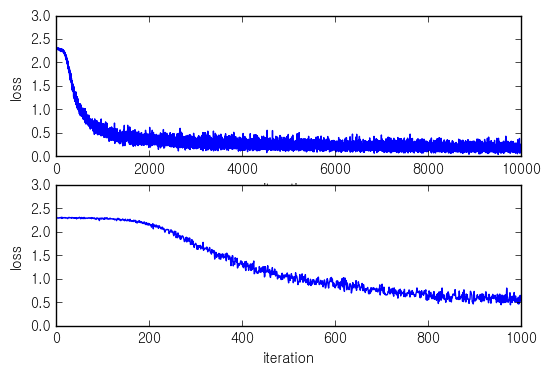

In [53]:
# 그림 4-11 손실 함수의 추이: 위쪽은 10,000회 반복까지의 추이, 아래쪽은 1,000회 반복까지의 추이
f, (ax1, ax2) = plt.subplots(2, 1)
x = np.array(range(iters_num))
ax1.plot(x, train_loss_list, label='loss')
ax1.set_xlabel("iteration")
ax1.set_ylabel("loss")
ax1.set_ylim(0, 3.0)
ax2.plot(x[:1000], train_loss_list[:1000], label='loss')
ax2.set_xlabel("iteration")
ax2.set_ylabel("loss")
ax2.set_ylim(0, 3.0)

학습 회수가 늘어나면서 손실 함수의 값이 줄어듬

학습이 잘 되고 있다는 뜻

데이터를 반복해서 학습함으로써 최적 가중치 매개변수로 서서히 다가서고 있다!

### 4.5.3 시험 데이터로 평가하기
훈련 데이터 외의 데이터를 올바르게 인식하는지 확인 필요. '오버피팅'을 일으키지 않는지 확인.

오버피팅: 훈련 데이터에 포함된 이미지만 제대로 구분. 그렇지 않은 이미지는 식별할 수 없다는 의미

범용 능력을 평가하기 위해 학습 도중 정기적으로 훈련 데이터와 시험 데이터를 대상으로 정확도를 기록.

1에폭별로 훈련 데이터와 시험 데이터에 대한 정확도를 기록.

에폭(epoch): 1에폭은 학습에서 훈련 데이터를 모두 소진했을 때의 회수에 해당.

훈련 데이터 10,000개를 100개의 미니배치로 학습할 경우, 100회가 1에폭이 됨.

앞의 코드로 얻은 결과를 그래프로 그리기

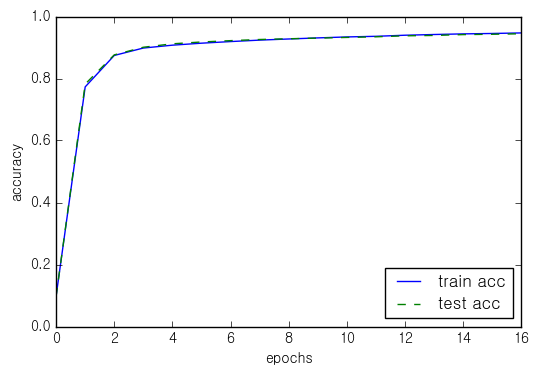

In [54]:
# 그림 4-12 훈련 데이터와 시험 데이터에 대한 정확도 추이
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

훈련 데이터에 대한 정확도는 실선. 시험 데이터에 대한 정확도는 점선

두 정확도에는 차이가 없음. 오버피팅이 발생하지 않음을 확인

오버피팅이 발생하면 훈련 데이터와 시험 데이터를 보면서 잘못된 판단을 함

이 순간을 포착해 학습을 중단하면 오버피팅을 예방 가능. => 조기 종료(early stopping)

'6.4 바른 학습을 위해'에서 살펴볼 '가중치 감소', '드롭아웃'과 함께 대표적은 오버피팅 예방법

### 4.6 정리
신경망 학습의 목표: 손실 함수 값이 가장 작아지는 가중치 매개변수 값을 찾아내는 것

경사법: 가능한 작은 손실 함수의 값을 찾는 수법. 함수의 기울기를 이용하는 방법

이번 장에서 배운 것

기계학습에서 사용하는 데이터 셋은 훈련 데이터와 시험 데이터로 나눠 사용

학습한 데이터의 범용 능력을 시험 데이터로 평가

신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신

이를 갱신할 때 가중치 매개변수의 기울기를 이용. 기울어진 방향으로 가중치의 값을 갱신하는 작업 반복

수치 미분 : 아주 작은 값을 주었을 때의 차분으로 미분을 구하는 것

수치 미분으로 가중치 매개변수의 기울기를 구할 수 있음

수히 미분을 이용한 계산은 시간이 걸림. 그 구현이 간단.

오차역전파법은 기울기를 고속으로 구할 수 있음.